# FIGURE 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from msresist.pre_processing import preprocessing
from msresist.figures.figure1 import plotClustergram, plotVarReplicates, plotReplicatesEndpoint, plotAveragedEndpoint, plotReplicatesFoldChangeEndpoint, plotVarReplicates, plotpca_explained, plotpca_ScoresLoadings_plotly
import warnings
warnings.simplefilter("ignore")

In [2]:
pd.set_option('display.max_colwidth', 1000)
# pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# 1. Phosphorylation Measurements

### A) PC9 AXL WT SAMPLES 

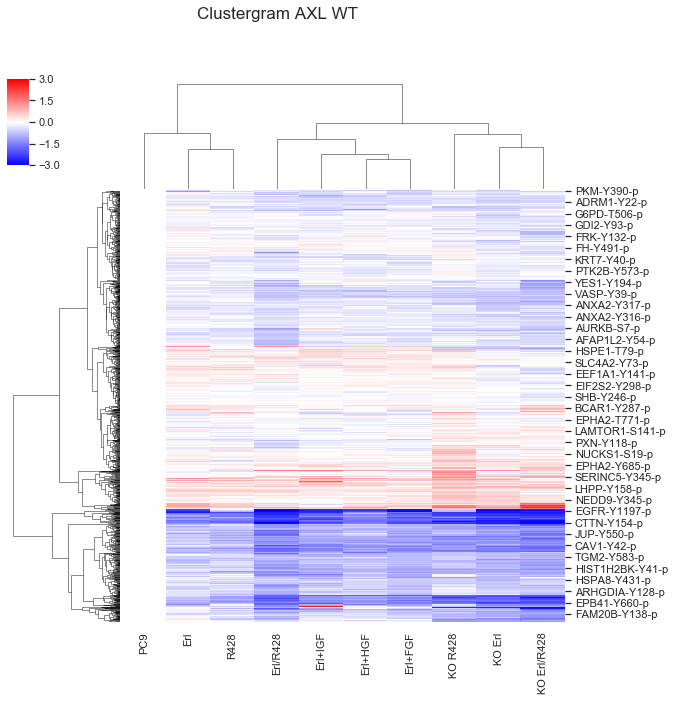

In [3]:
ABC_wt = preprocessing(AXLwt=True, motifs=True, Vfilter=False, FCfilter=False, log2T=False)
data_wt = np.log(pd.concat([ABC_wt.iloc[:, 3:5], ABC_wt.iloc[:, 5:]], axis=1).set_index(["Abbv", "Position"]))
plotClustergram(data_wt, max(np.max(np.abs(data_wt))*0.8), "Clustergram AXL WT")

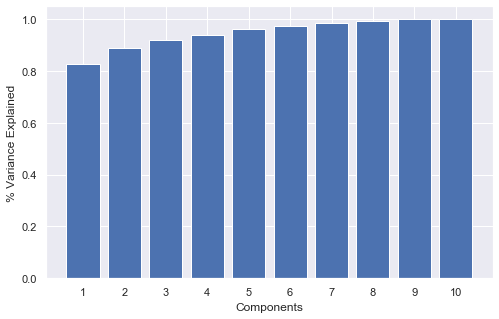

In [4]:
fig, ax = fig, ax = plt.subplots(1, 1, figsize=(8, 5))

plotpca_explained(ax, data_wt, data_wt.shape[1])

               PC1       PC2
Position                    
Y759-p    0.024039 -0.029339
Y866-p    0.058708 -0.099170
Y702-p    0.115867 -0.175855
Y481-p    0.079450 -0.151295
Y703-p    0.153101 -0.221603


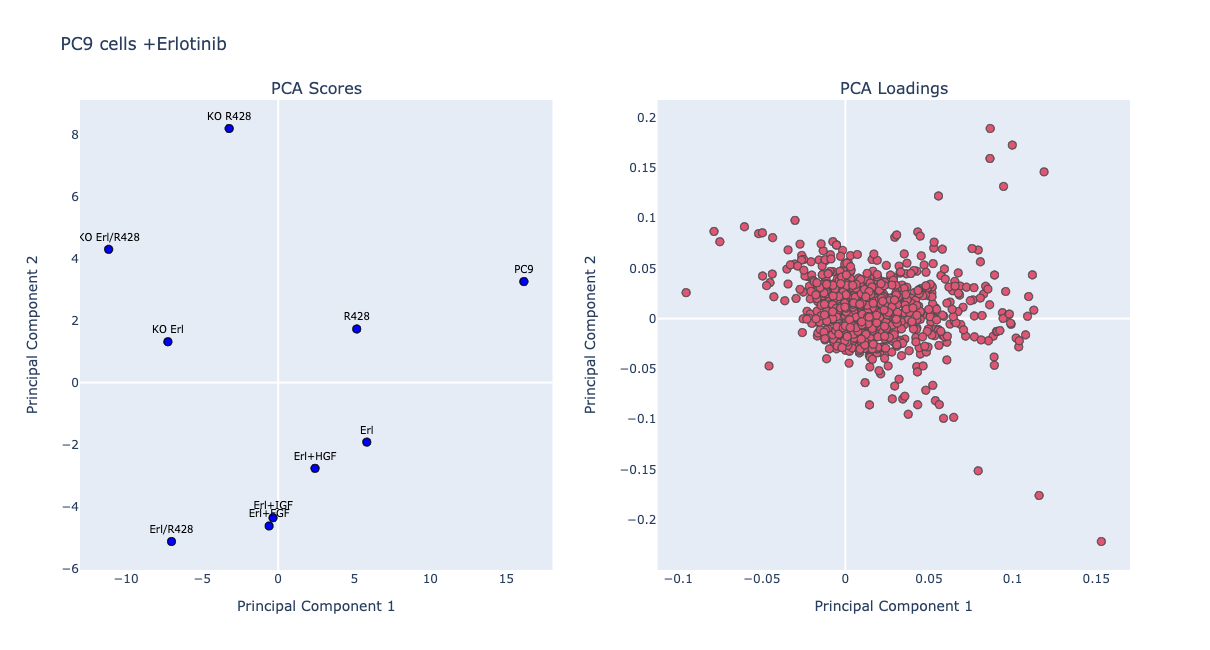

In [5]:
plotpca_ScoresLoadings_plotly(data_wt.T, "PC9 cells +Erlotinib", "AXL")

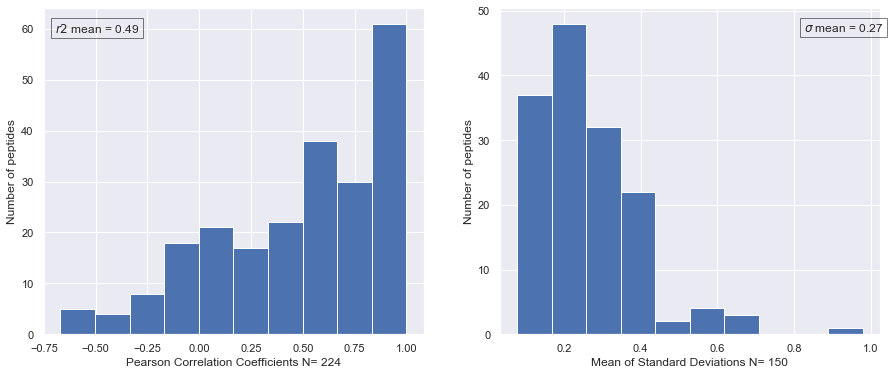

In [6]:
ABCwt_raw = preprocessing(AXLwt=True, rawdata=True)

fig, ax = plt.subplots(1, 2, figsize=(15,6))
plotVarReplicates(ax, ABCwt_raw)

Variability of overlapping peptides across MS replicates. Pearson's correlation coefficient was computed for peptides overlapping across 2 MS replicates. For those overlapping 3 or more times, the Std was calculated.

### B) PC9 AXL MUTANTS TREATED WITH ERLOTINIB 

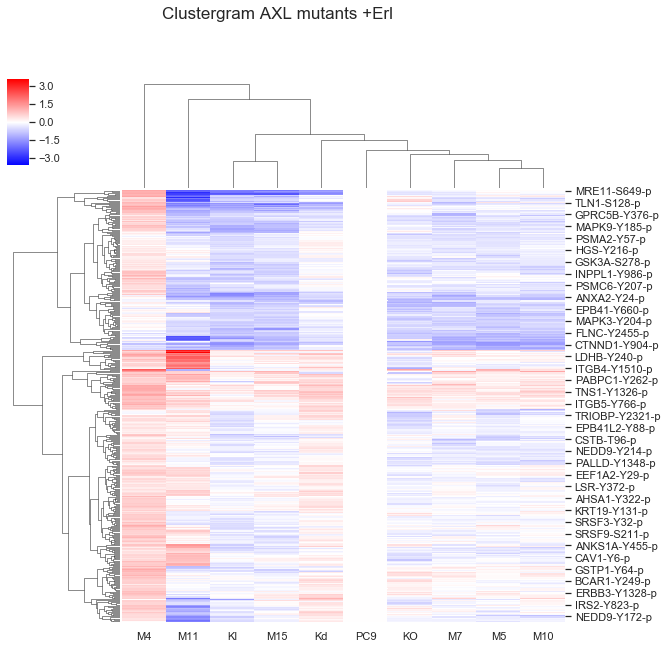

In [7]:
ABC_mutErl = preprocessing(Axlmuts_Erl=True, motifs=True, Vfilter=False, FCfilter=False, log2T=False)
data_mutErl = np.log(pd.concat([ABC_mutErl.iloc[:, 3:5], ABC_mutErl.iloc[:, 5:]], axis=1).set_index(["Abbv", "Position"]))
# data_mutErl = np.log(pd.concat([ABC_mutErl.iloc[:, 3], ABC_mutErl.iloc[:, 5:]], axis=1).set_index("Abbv"))

plotClustergram(data_mutErl, max(np.max(np.abs(data_mutErl))), "Clustergram AXL mutants +Erl")

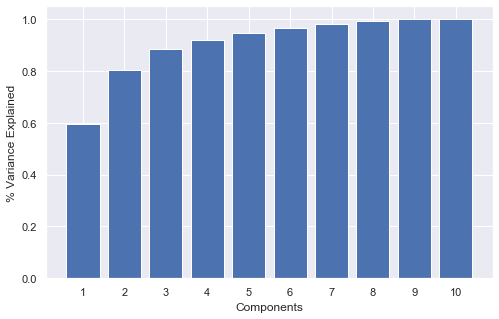

In [8]:
fig, ax = fig, ax = plt.subplots(1, 1, figsize=(8, 5))

plotpca_explained(ax, data_mutErl, data_mutErl.shape[1])

               PC1       PC2
Position                    
Y759-p    0.073831 -0.020113
Y866-p   -0.015023  0.035853


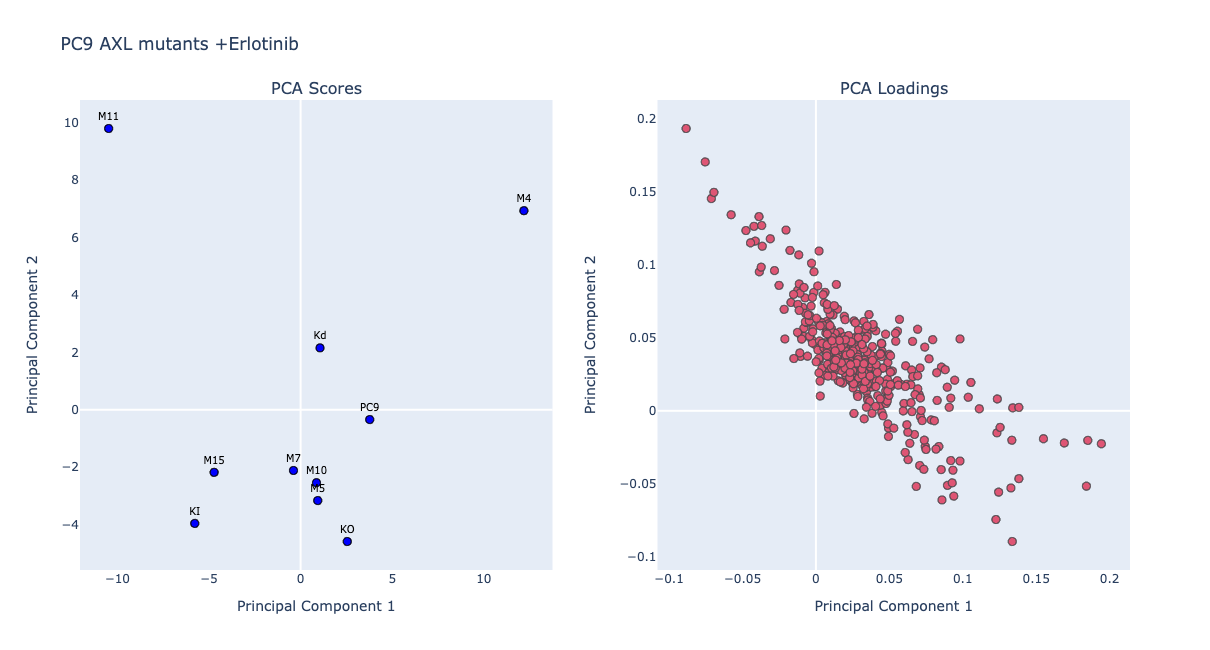

In [9]:
plotpca_ScoresLoadings_plotly(data_mutErl.T, "PC9 AXL mutants +Erlotinib", "AXL")

### C) PC9 AXL MUTANTS TREATED WITH ERLOTINIB AND F154

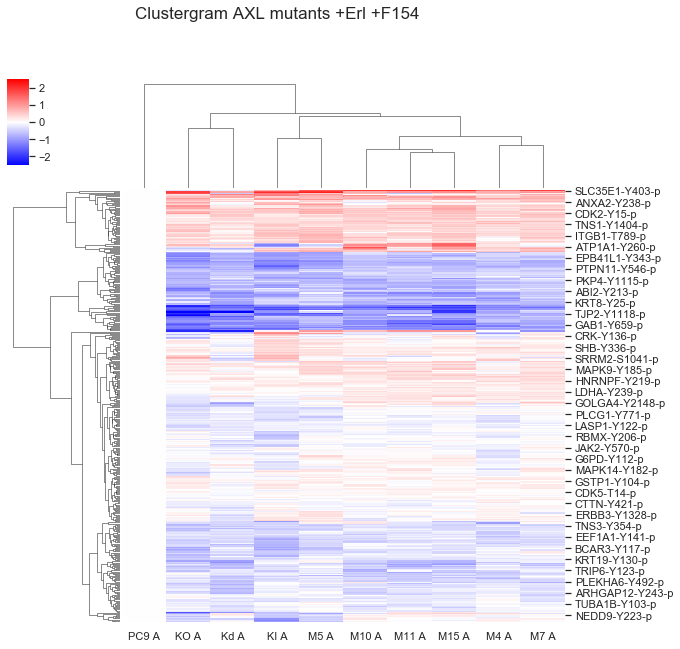

In [10]:
ABC_mutF154 = preprocessing(Axlmuts_ErlF154=True, motifs=True, Vfilter=False, FCfilter=False, log2T=False)
data_mutF154 = np.log(pd.concat([ABC_mutF154.iloc[:, 3:5], ABC_mutF154.iloc[:, 5:]], axis=1).set_index(["Abbv", "Position"]))
plotClustergram(data_mutF154, max(np.max(np.abs(data_mutF154))), "Clustergram AXL mutants +Erl +F154")

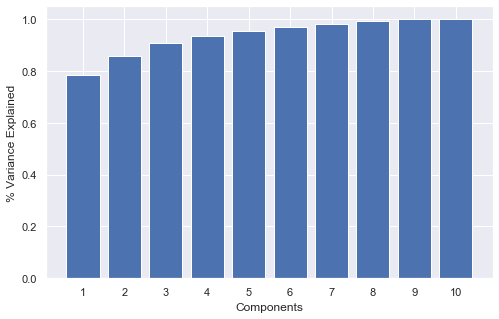

In [11]:
fig, ax = fig, ax = plt.subplots(1, 1, figsize=(8, 5))

plotpca_explained(ax, data_mutF154, data_mutF154.shape[1])

In [12]:
plotpca_ScoresLoadings_plotly(data_mutF154.T, "PC9 +Erl +F154", "AXL")

               PC1       PC2
Position                    
Y759-p    0.025424 -0.023900
Y866-p    0.130353 -0.085125
Y702-p    0.125769 -0.075737


### D) CONCATENATING BOTH AXL MUTANT DATA SETS AND SETTING FOLD CHANGE TO PC9 + ERLOTINIB

In [13]:
ABC_mutErl_raw = pd.read_csv("./msresist/data/Raw/PC9_mutants_unstim_BR1_raw.csv")
ABC_mutF154_raw = pd.read_csv("./msresist/data/Raw/PC9_mutants_ActivatingAb_BR1_raw.csv")

In [14]:
from msresist.sequence_analysis import FormatName

ln, sn = FormatName(ABC_mutErl_raw)
ABC_mutErl_raw["Protein"] = ln
ABC_mutErl_raw = ABC_mutErl_raw.assign(Abbv=sn)

ln, sn = FormatName(ABC_mutF154_raw)
ABC_mutF154_raw["Protein"] = ln
ABC_mutF154_raw = ABC_mutF154_raw.assign(Abbv=sn)

In [15]:
from msresist.pre_processing import MapOverlappingPeptides

ABC_mutF154_raw.columns = ABC_mutErl_raw.columns

_, overlap, _ = MapOverlappingPeptides(pd.concat([ABC_mutF154_raw, ABC_mutErl_raw]))

In [16]:
ABC_mutErl = ABC_mutErl_raw.set_index(["Protein", "Sequence"])
ABC_mutF154 = ABC_mutF154_raw.set_index(["Protein", "Sequence"])

prots = list(overlap.iloc[:, 0])
seqs = list(overlap.iloc[:, 1])

ERL, F154 = [], []
for i in range(overlap.shape[0]):
    ERL.append(ABC_mutErl.loc[prots[i], seqs[i]])
    F154.append(ABC_mutF154.loc[prots[i], seqs[i]])

ERL = pd.DataFrame(ERL).reset_index()
F154 = pd.DataFrame(F154).reset_index().iloc[:, 1:]

In [17]:
ABC_mutF154.columns = list(ABC_mutF154.columns[:1]) + [col + str(" + F154") for col in list(ABC_mutF154.columns)[1:]]
F154.columns = ABC_mutF154.columns

In [18]:
conc = pd.concat([ERL, F154.iloc[:, 1:10]], axis=1).set_index("Abbv").iloc[:, 2:]
conc = np.log(conc.div(conc.iloc[:, 0], axis=0))

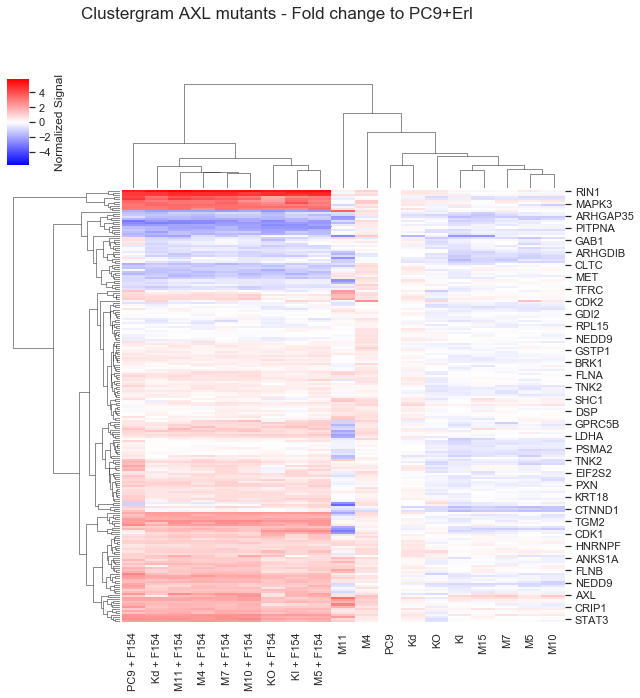

In [19]:
import seaborn as sns

g = sns.clustermap(conc, method="complete", robust=True, vmax=max(np.max(np.abs(conc))), vmin=-max(np.max(np.abs(conc))), cmap="bwr", col_cluster=True, cbar_kws={"label":"Normalized Signal"})
g.fig.suptitle( "Clustergram AXL mutants - Fold change to PC9+Erl", fontsize=17)
ax = g.ax_heatmap
ax.set_ylabel("");

## 2. Cell Viability Measurements:

Average between two replicates. Fold-change 72h vs 0h.

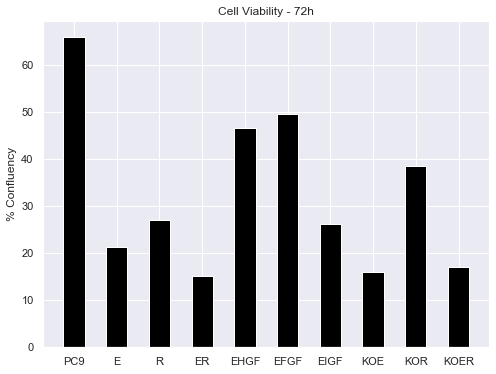

In [20]:
Y_cv1 = pd.read_csv('./msresist/data/Phenotypic_data/CV_raw3.csv').iloc[:30, :11]
Y_cv2 = pd.read_csv('./msresist/data/Phenotypic_data/CV_raw4.csv').iloc[:29, :11]

fig, ax = plt.subplots(1, 1, figsize=(8,6))
plotAveragedEndpoint(ax, Y_cv1, Y_cv2)

Raw Measurements of both replicates. Initial seeding was clearly off in Exp4.

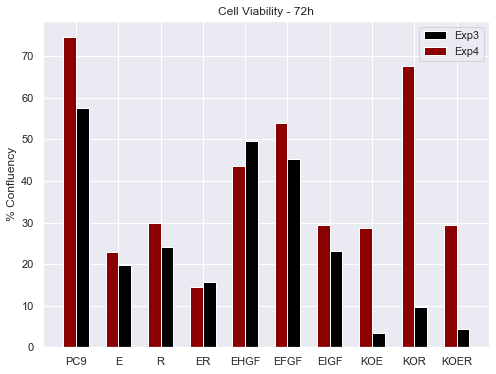

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
plotReplicatesEndpoint(ax, Y_cv1, Y_cv2)

However, by fold-changing to t=0h, both replicates are notably reproducible:

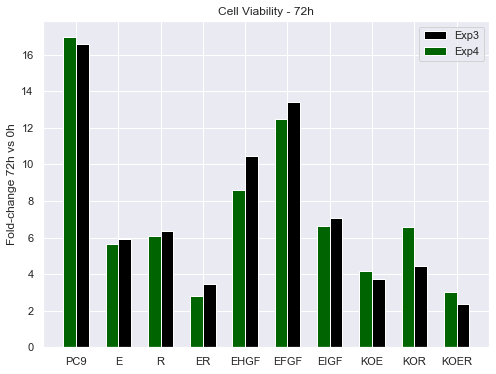

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
plotReplicatesFoldChangeEndpoint(ax, Y_cv1, Y_cv2)

## Cell Viability levels of RIPK1-Transfected PC9 cells

In [23]:
Time = pd.read_csv('./msresist/data/Phenotypic_data/RIPK1_CV_PC9_samples_raw_byRow.csv', delimiter='\t').iloc[:, 1]
full = pd.read_csv('./msresist/data/Phenotypic_data/RIPK1_CV_PC9_samples_raw_byRow.csv', delimiter='\t').iloc[:, 2:]

In [24]:
avg_full = np.zeros((20, 24))
for i in range(full.shape[0]):
    for j in range(int(full.shape[1]/3)):
        avg_full[i, j] = full.iloc[i, j*3:(j+1)*3].mean()
        
avg_full = pd.DataFrame(avg_full)

In [25]:
full = pd.concat([Time, avg_full], axis=1)
full.columns = ["Elapsed", ".8_wt+fbs", ".8_wt-fbs", ".8_YF+fbs", ".8_YF-fbs", 
                "1_wt+fbs", "1_wt-fbs", "1_YF+fbs", "1_YF-fbs",
                "1.3_wt+fbs", "1.3_wt-fbs","1.3_YF+fbs", "1.3_YF-fbs",
                "1.5_wt+fbs", "1.5_wt-fbs","1.5_YF+fbs", "1.5_YF-fbs",
                "2_wt+fbs", "2_wt-fbs","2_YF+fbs", "2_YF-fbs",
                "3_wt+fbs", "3_wt-fbs", "3_YF+fbs", "3_YF-fbs"]

full = full.set_index("Elapsed")

In [26]:
Xidx = [i for i in range(0,24,2)]
full = full.iloc[:, Xidx]

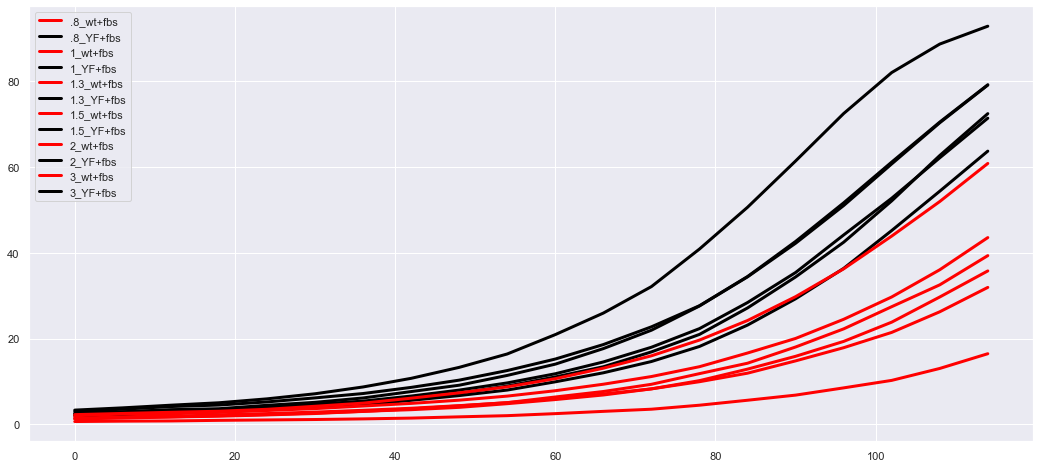

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(18,8))

for i in range(12):
    if i in [j for j in range(0, 12, 2)]:
        ax.plot(full.iloc[:, i], label=full.columns[i], linewidth=3, color="red")
    else:
        ax.plot(full.iloc[:, i], label=full.columns[i], linewidth=3, color="black")

ax.legend(loc=2);

In [28]:
full = full.reset_index()

In [29]:
import scipy as sp

Y_cv0 = full[full["Elapsed"] == 0].iloc[0, 1:]
Y_fc108 = full[full["Elapsed"] == 108].iloc[0, 1:] / Y_cv0

print(sp.stats.pearsonr(Y_cv0, Y_fc108)[1])
assert sp.stats.pearsonr(Y_cv0, Y_fc108)[1] > 0.05, "cell seeding effect"

for ii in range(1, full.columns.size):
    full.iloc[:, ii] /= full.iloc[0, ii]

0.14426943843606974


In [30]:
full = full.set_index("Elapsed")

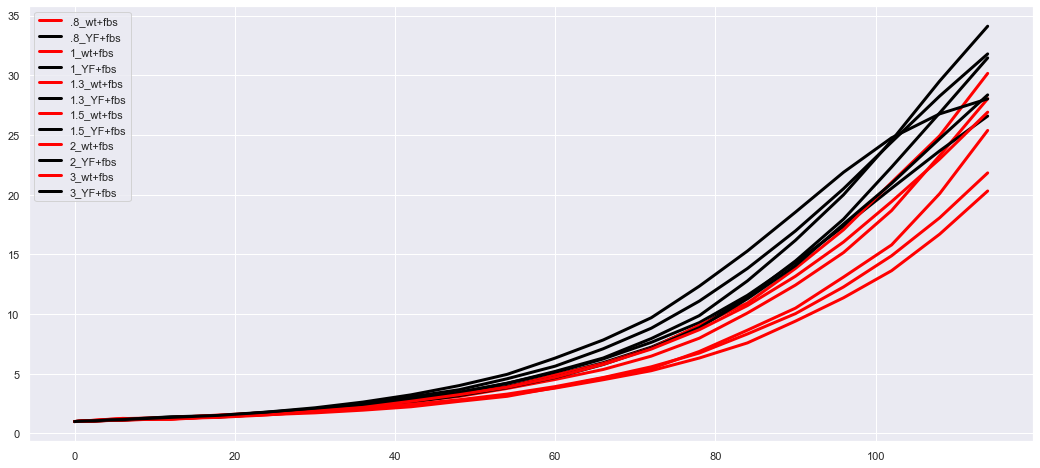

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(18,8))

for i in range(12):
    if i in [j for j in range(0, 12, 2)]:
        ax.plot(full.iloc[:, i], label=full.columns[i], linewidth=3, color="red")
    else:
        ax.plot(full.iloc[:, i], label=full.columns[i], linewidth=3, color="black")

ax.legend(loc=2)

In [32]:
full = full.reset_index()

Text(0, 0.5, 'fold-change confluency')

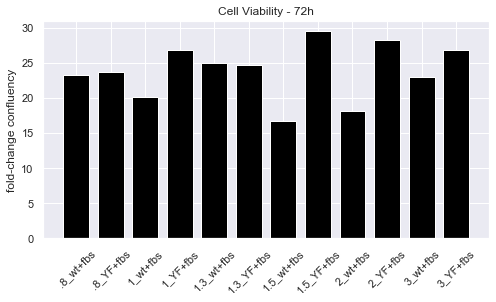

In [33]:
fig, ax = plt.subplots(1, figsize=(8,4))

range_ = np.linspace(1, 12, 12)

ax.set_title("Cell Viability - 72h")
ax.set_xticks(np.arange(1, 13, 1))
ax.set_xticklabels(full.columns[1:], rotation=45)
ax.bar(range_, full[full["Elapsed"] == 108].iloc[0, 1:], width=0.75, align='center', color="black")
ax.set_ylabel("fold-change confluency")